# Import liberary

In [296]:
!pip install tensorflow
!pip install missingno
import pandas as pd
import seaborn as sns
import missingno as msno
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV, RFE
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')

# Data Overview

In [297]:
data = pd.read_csv('cirrhosis_data.csv')
data = data.drop('ID', axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

### data statistical description

In [298]:
# Get descriptive statistics
print(data.describe())

            N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000   

### Checking the missing values

In [299]:
print(data.isnull().sum())

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


### visualize missing value

<Axes: >

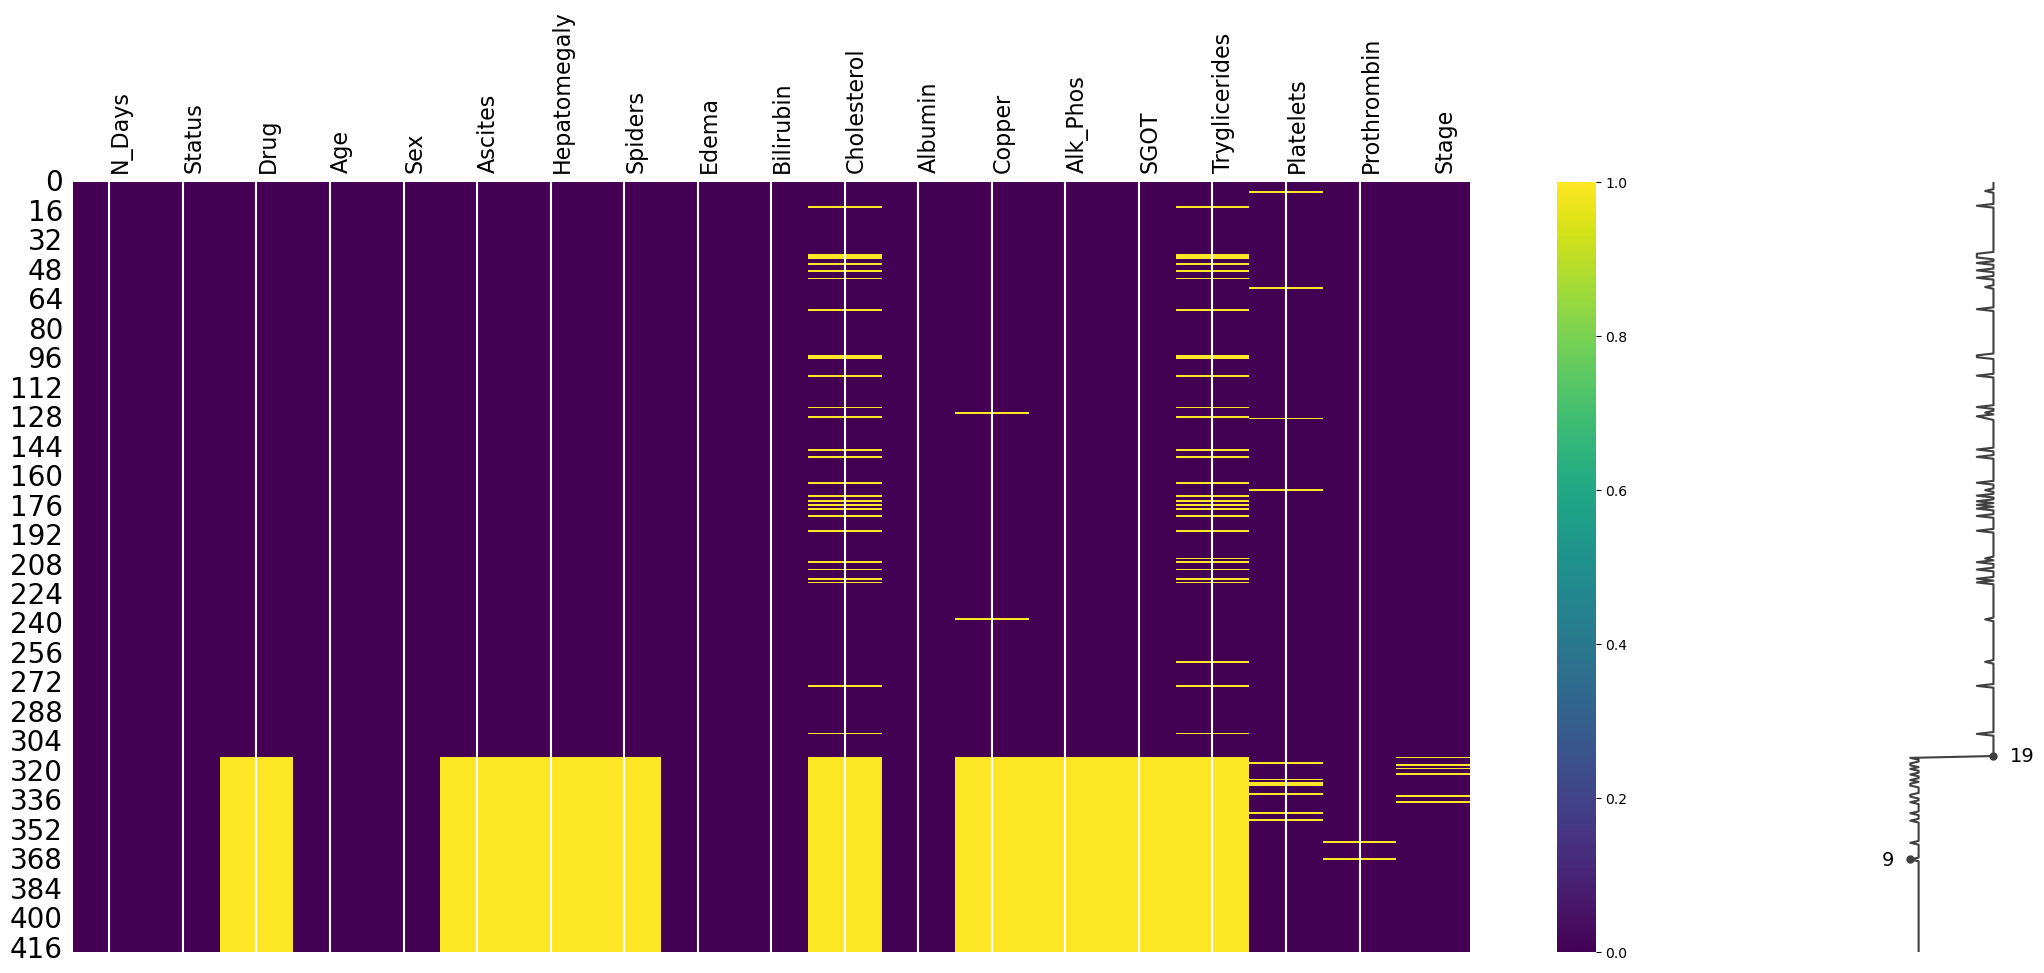

In [300]:
# Visualize missing values
msno.matrix(data)
sns.heatmap(data.isnull(), cmap='viridis')

# data Cleaning

### Deviding data on basis of categorical or numerical data

In [301]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print(data)

Numerical Columns: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
Categorical Columns: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
     N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0       400      D  D-penicillamine  21464   F       Y            Y       Y   
1      4500      C  D-penicillamine  20617   F       N            Y       Y   
2      1012      D  D-penicillamine  25594   M       N            N       N   
3      1925      D  D-penicillamine  19994   F       N            Y       Y   
4      1504     CL          Placebo  13918   F       N            Y       Y   
..      ...    ...              ...    ...  ..     ...          ...     ...   
413     681      D              NaN  24472   F     NaN          NaN     NaN   
414    1103      C              NaN  14245   F     NaN          NaN     NaN   
415    1055      C              NaN

### Visual representation of Numerical data before imputation

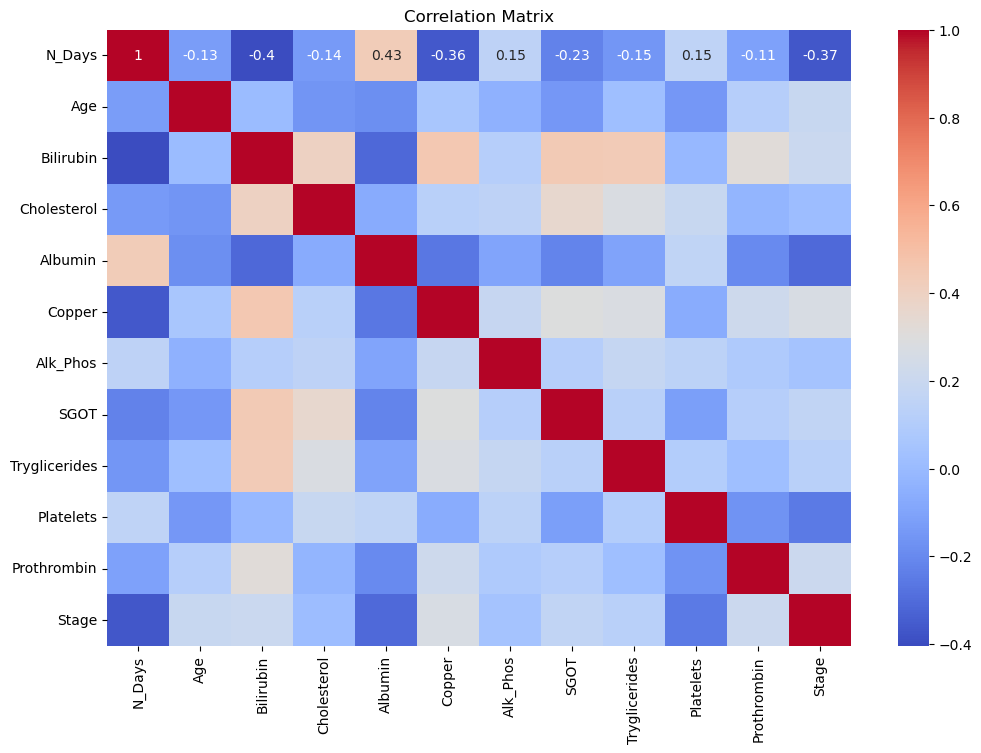

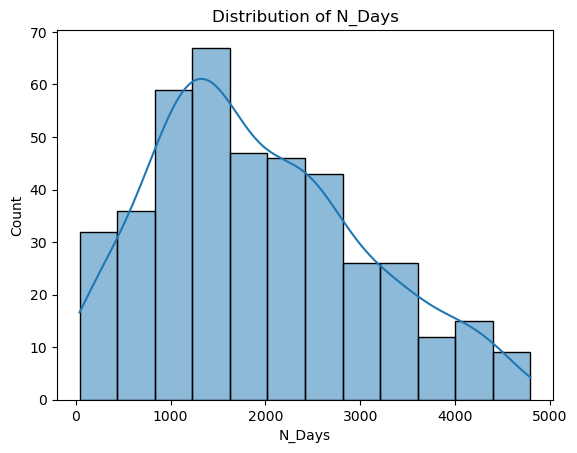

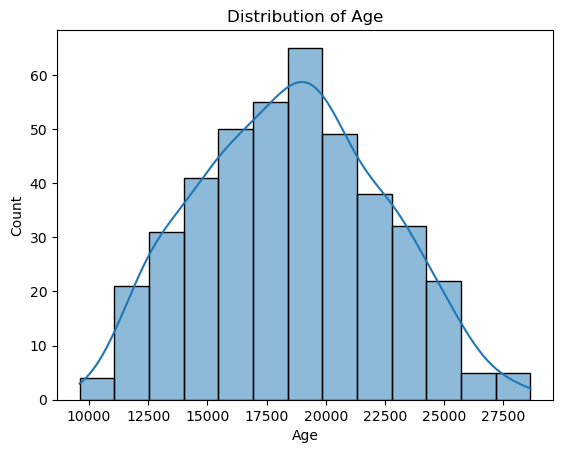

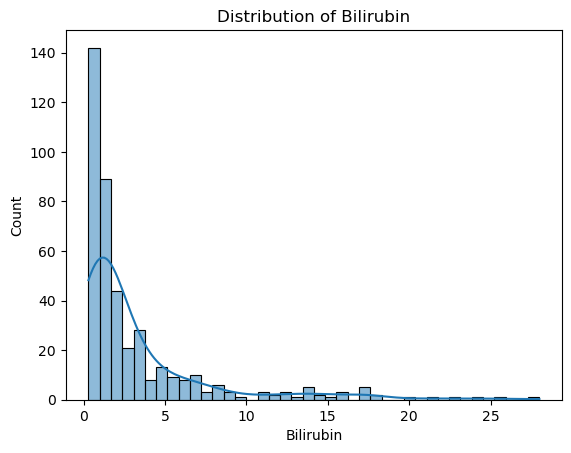

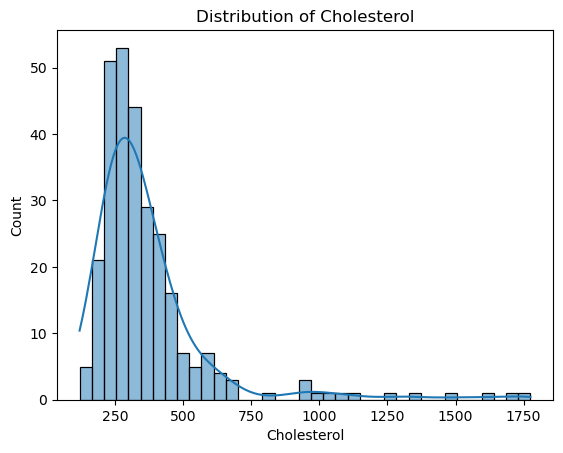

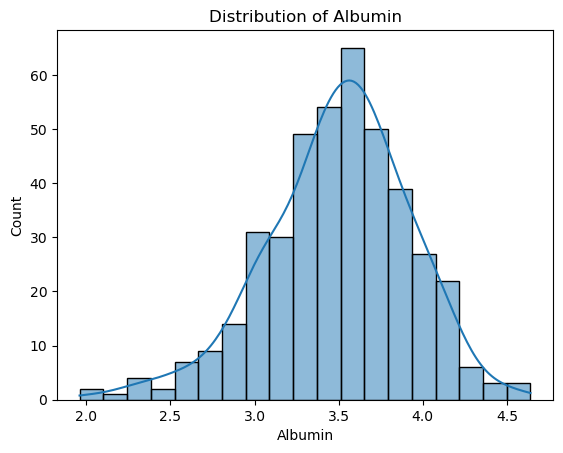

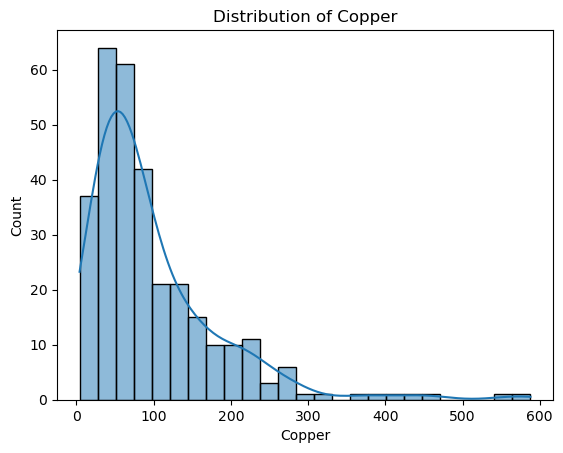

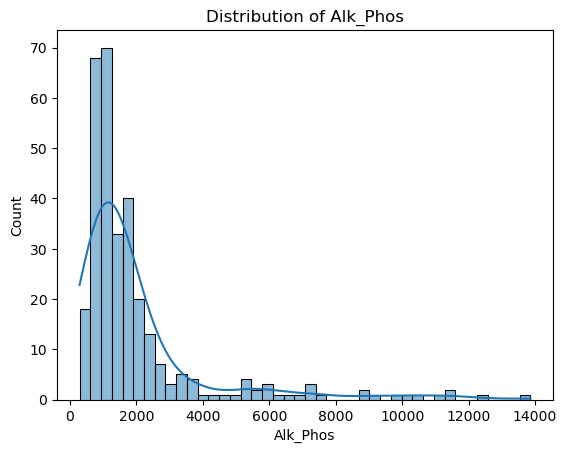

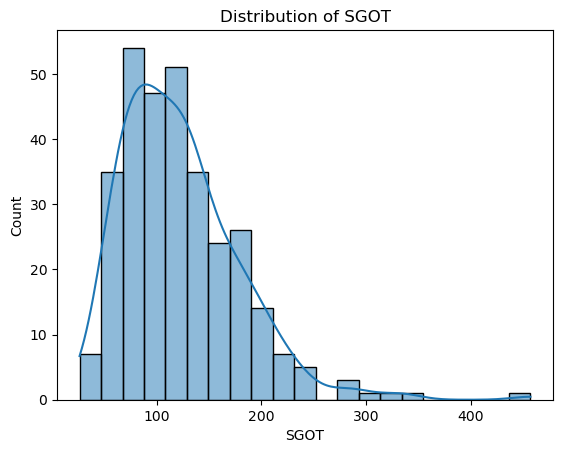

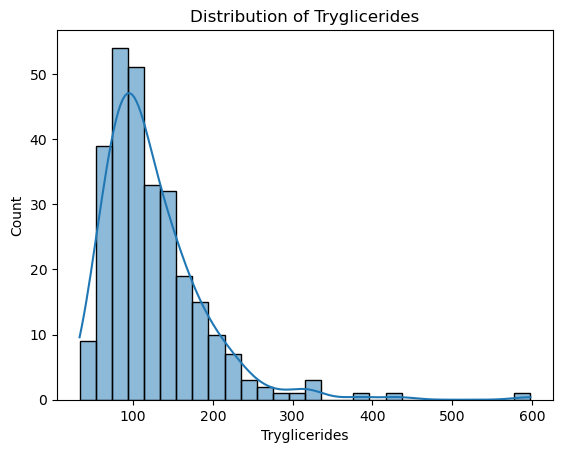

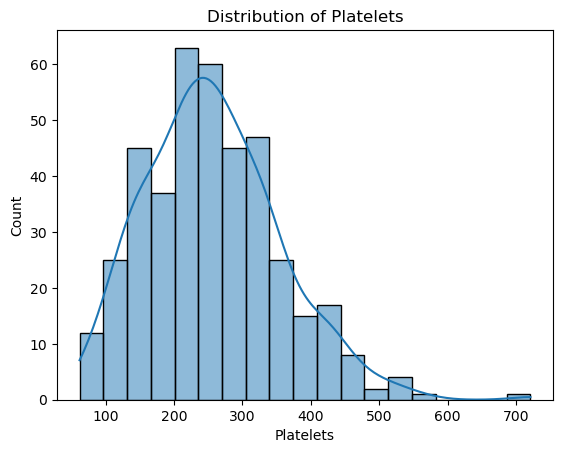

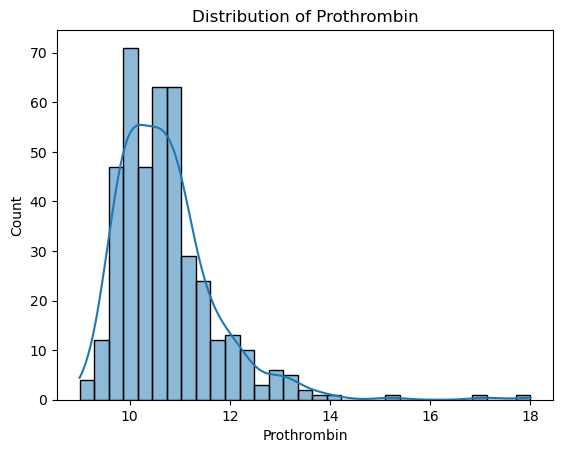

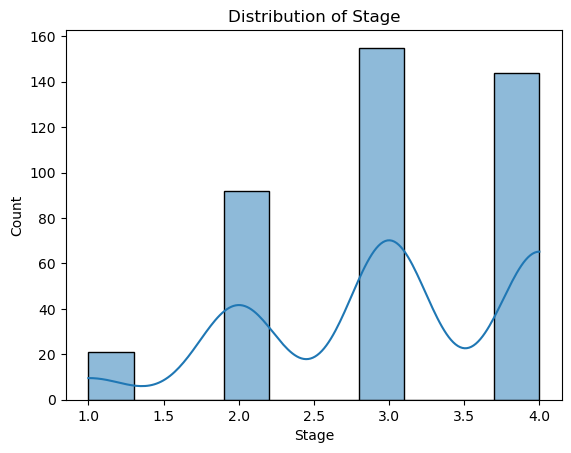

In [302]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

for col in numerical_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Visual representation of Categorical data before imputation

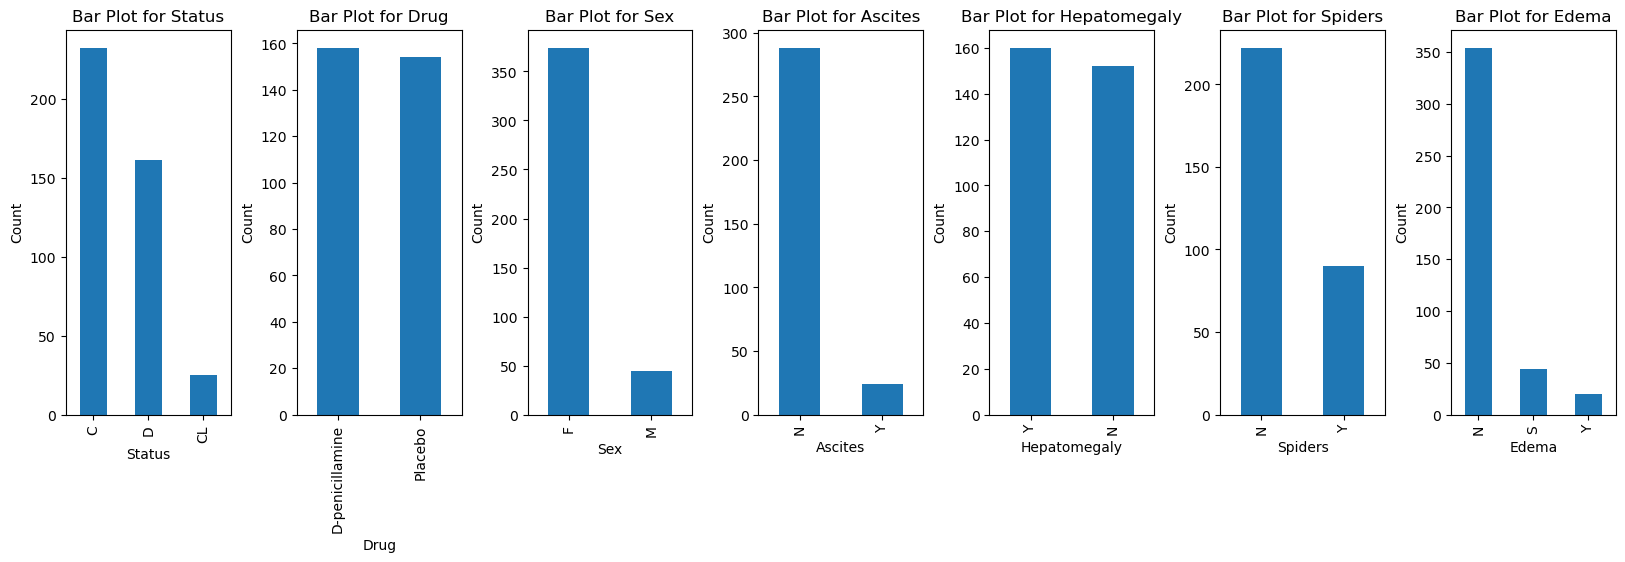

In [303]:
num_cols = len(categorical_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(20, 5))

# Plot bar plots for categorical columns
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Bar Plot for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


### Check for duplicates

In [304]:
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


### Box plot before imputation

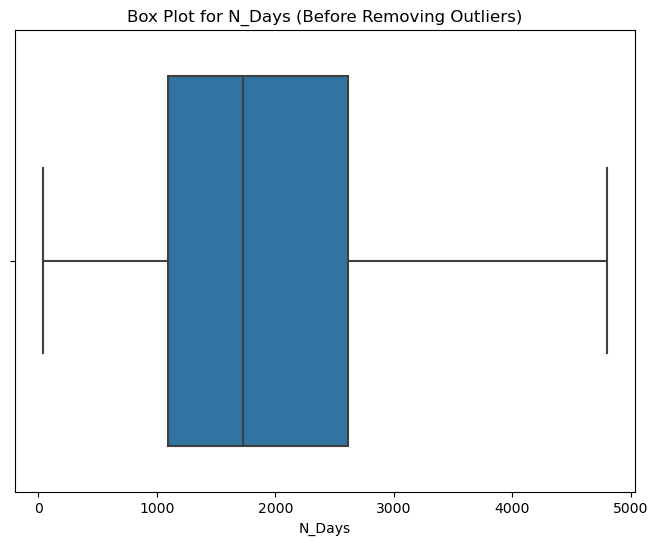

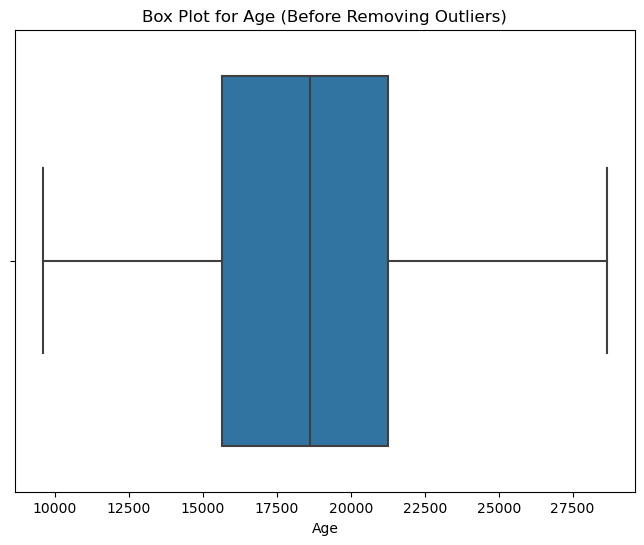

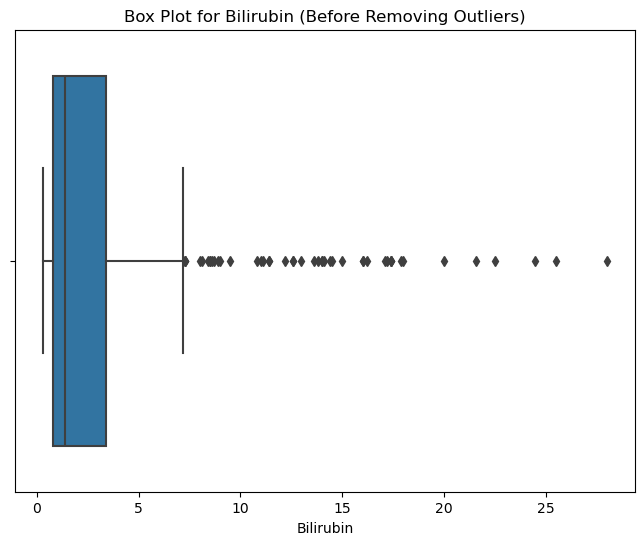

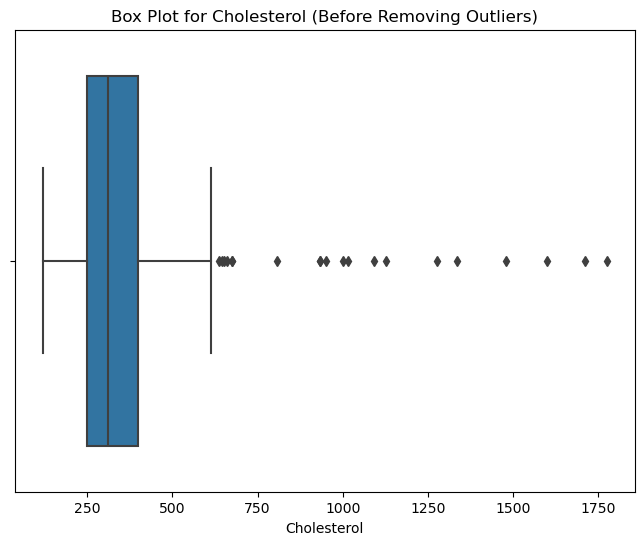

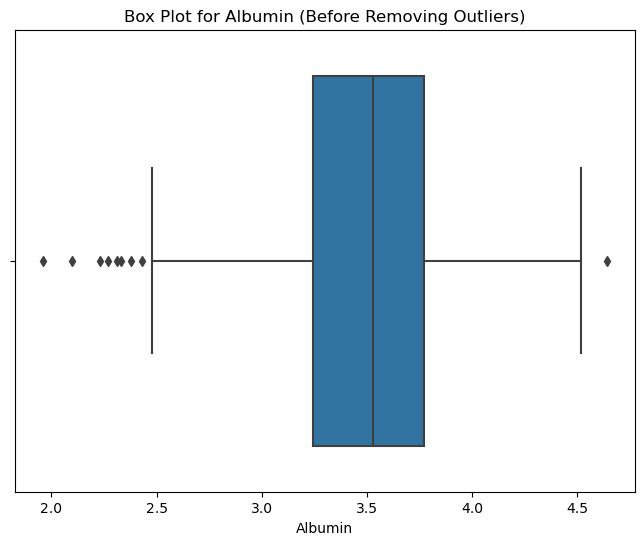

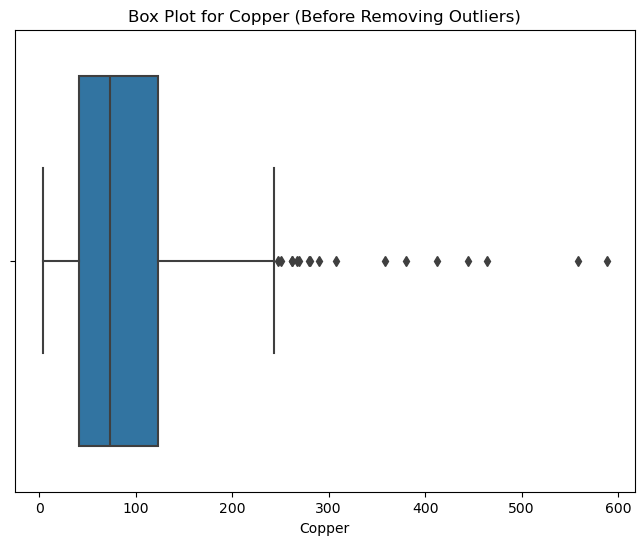

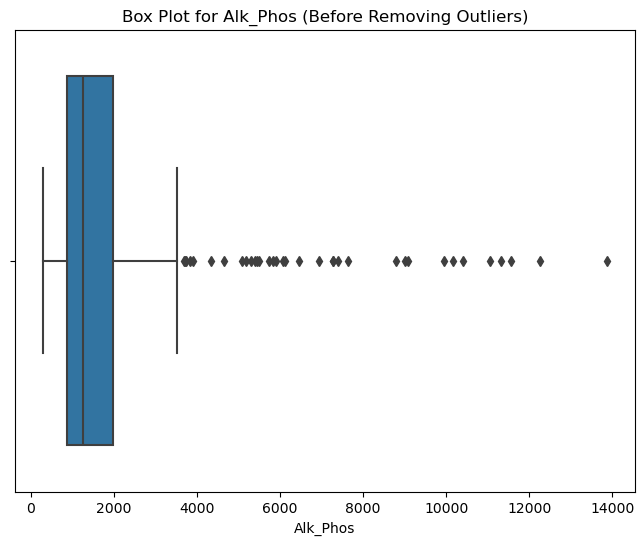

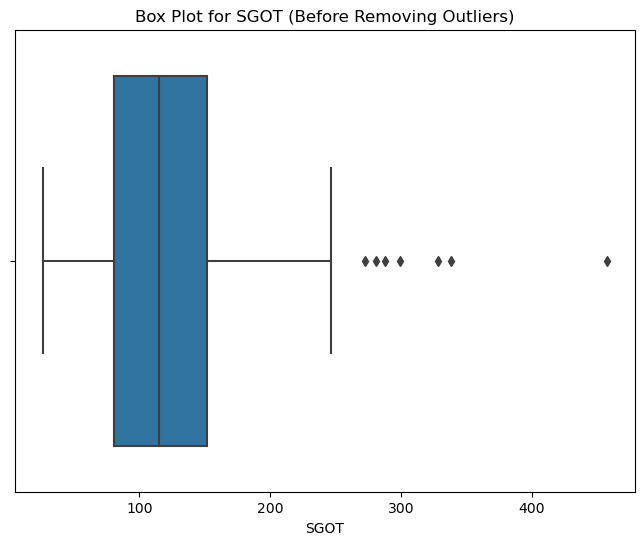

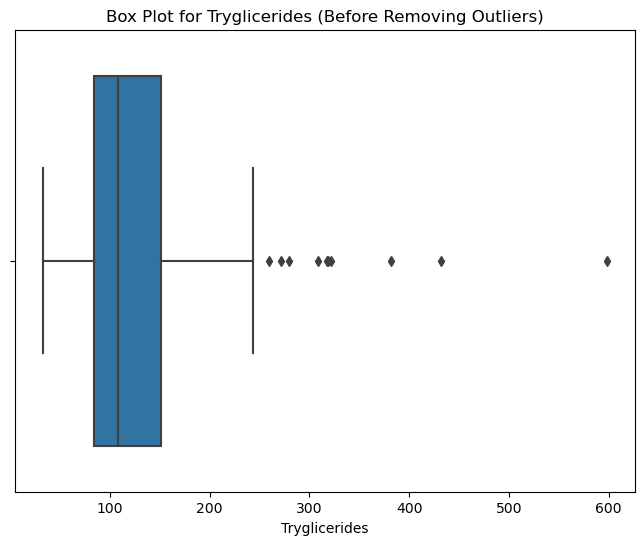

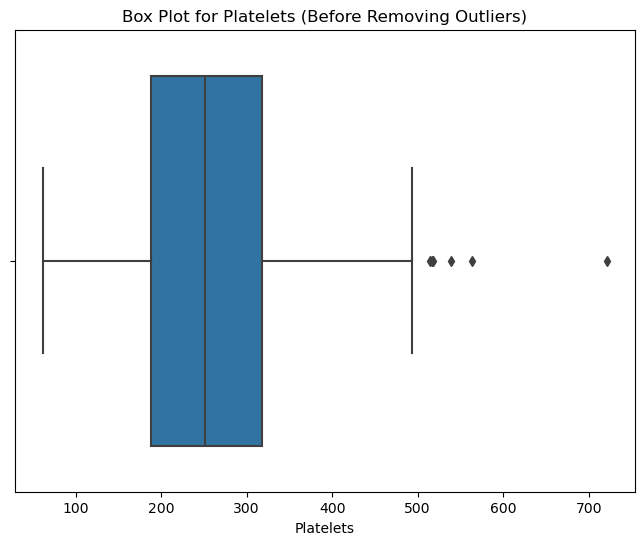

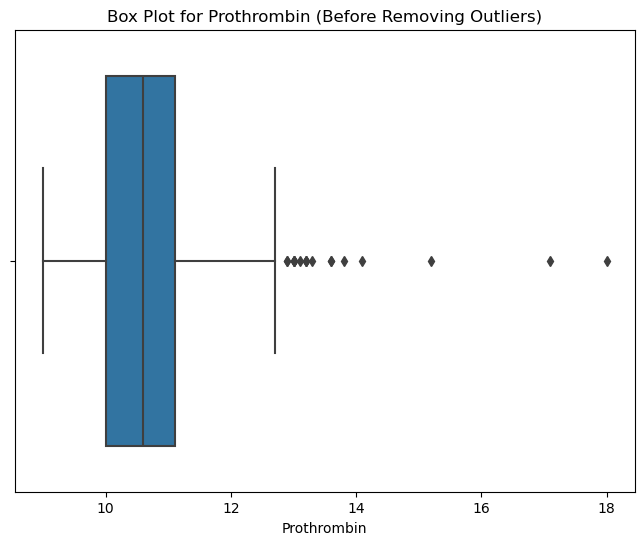

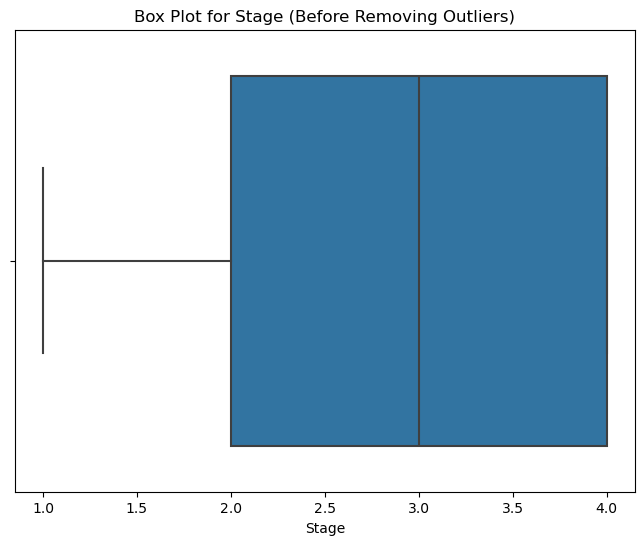

In [305]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=col)
    plt.title(f'Box Plot for {col} (Before Removing Outliers)')
    plt.show()

### using mode for categorical data

In [306]:
# remove the missing values by removing entire row for most important data like Drug,status, age etc where we cannot impute the data
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[categorical_cols] = imp_mode.fit_transform(data[categorical_cols])
print(data)

     N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0       400      D  D-penicillamine  21464   F       Y            Y       Y   
1      4500      C  D-penicillamine  20617   F       N            Y       Y   
2      1012      D  D-penicillamine  25594   M       N            N       N   
3      1925      D  D-penicillamine  19994   F       N            Y       Y   
4      1504     CL          Placebo  13918   F       N            Y       Y   
..      ...    ...              ...    ...  ..     ...          ...     ...   
413     681      D  D-penicillamine  24472   F       N            Y       N   
414    1103      C  D-penicillamine  14245   F       N            Y       N   
415    1055      C  D-penicillamine  20819   F       N            Y       N   
416     691      C  D-penicillamine  21185   F       N            Y       N   
417     976      C  D-penicillamine  19358   F       N            Y       N   

    Edema  Bilirubin  Cholesterol  Albumin  Copper 

### imputing data with median

In [307]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
data[numerical_cols] = imp_median.fit_transform(data[numerical_cols])

### Checking the missing values

In [308]:
print(data.isnull().sum())

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


### visualize missing value on heat map

<Axes: >

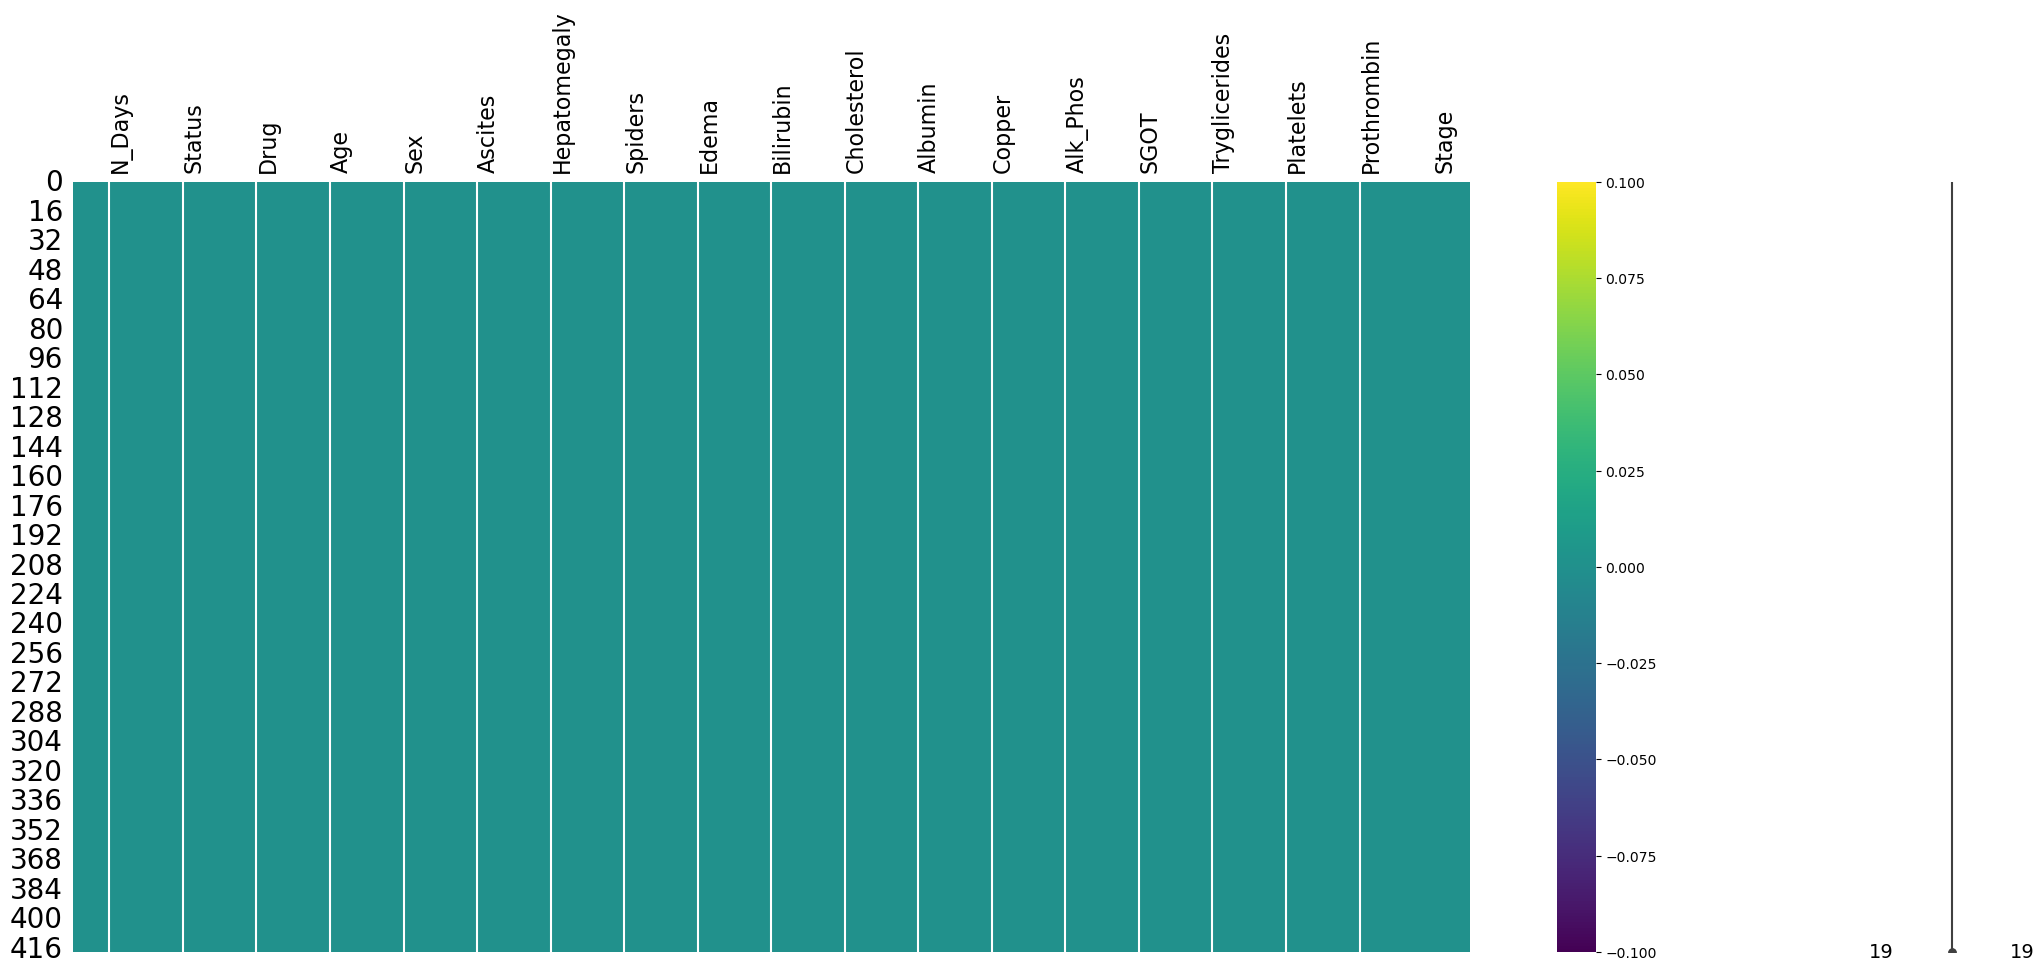

In [309]:
# Visualize missing values
msno.matrix(data)
sns.heatmap(data.isnull(), cmap='viridis')

### Encoding categorical columns

In [310]:
status_mapping = {'D': 0, 'C': 1, 'CL': 2}
data['Status'] = data['Status'].map(status_mapping)
# Label encode categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
print(data)

     N_Days  Status  Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  \
0     400.0       0     0  21464.0    0        1             1        1   
1    4500.0       1     0  20617.0    0        0             1        1   
2    1012.0       0     0  25594.0    1        0             0        0   
3    1925.0       0     0  19994.0    0        0             1        1   
4    1504.0       2     1  13918.0    0        0             1        1   
..      ...     ...   ...      ...  ...      ...           ...      ...   
413   681.0       0     0  24472.0    0        0             1        0   
414  1103.0       1     0  14245.0    0        0             1        0   
415  1055.0       1     0  20819.0    0        0             1        0   
416   691.0       1     0  21185.0    0        0             1        0   
417   976.0       1     0  19358.0    0        0             1        0   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0        2       14.5     

### Handling outliers

In [311]:
# Handle outliers
z_scores = data[numerical_cols].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
data = data[~outliers]
print(data)

     N_Days  Status  Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  \
0     400.0       0     0  21464.0    0        1             1        1   
1    4500.0       1     0  20617.0    0        0             1        1   
2    1012.0       0     0  25594.0    1        0             0        0   
3    1925.0       0     0  19994.0    0        0             1        1   
4    1504.0       2     1  13918.0    0        0             1        1   
..      ...     ...   ...      ...  ...      ...           ...      ...   
413   681.0       0     0  24472.0    0        0             1        0   
414  1103.0       1     0  14245.0    0        0             1        0   
415  1055.0       1     0  20819.0    0        0             1        0   
416   691.0       1     0  21185.0    0        0             1        0   
417   976.0       1     0  19358.0    0        0             1        0   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0        2       14.5     

### box plot after data cleaning

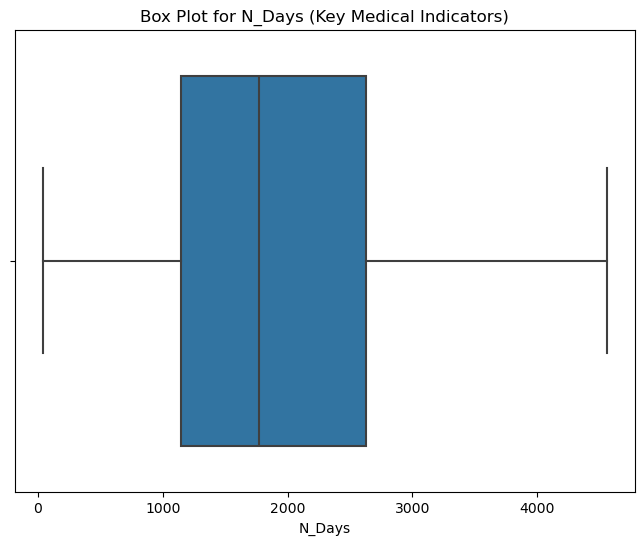

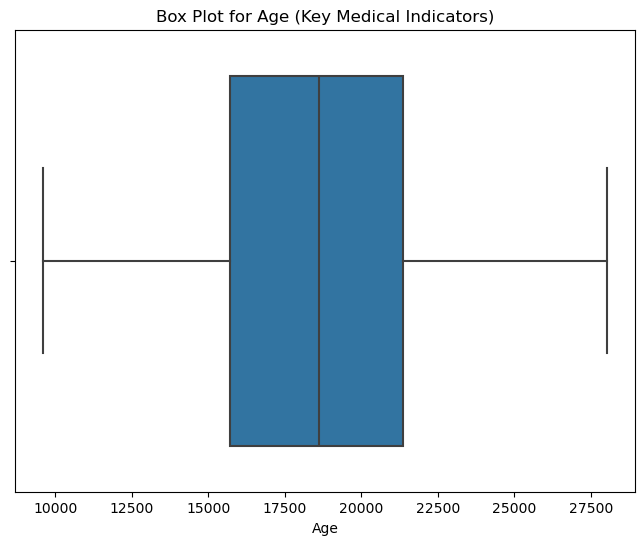

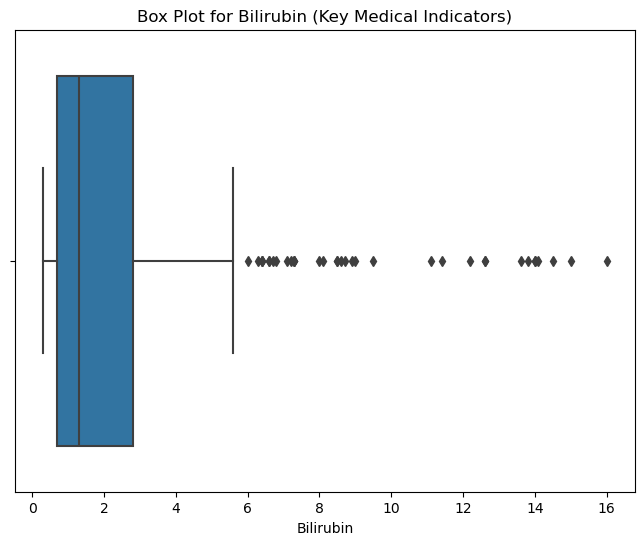

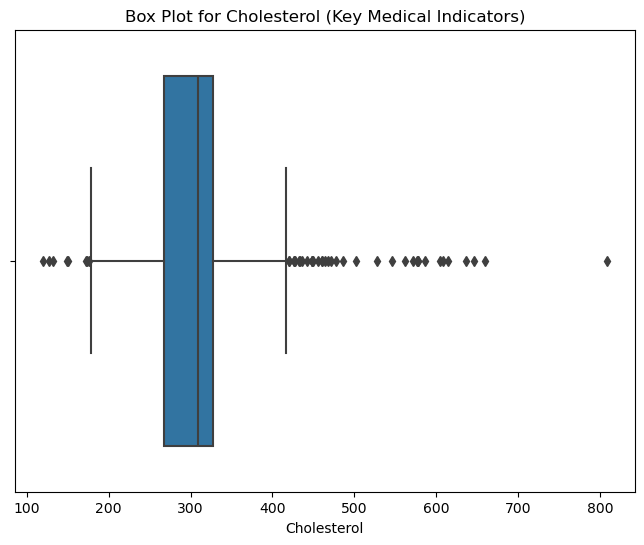

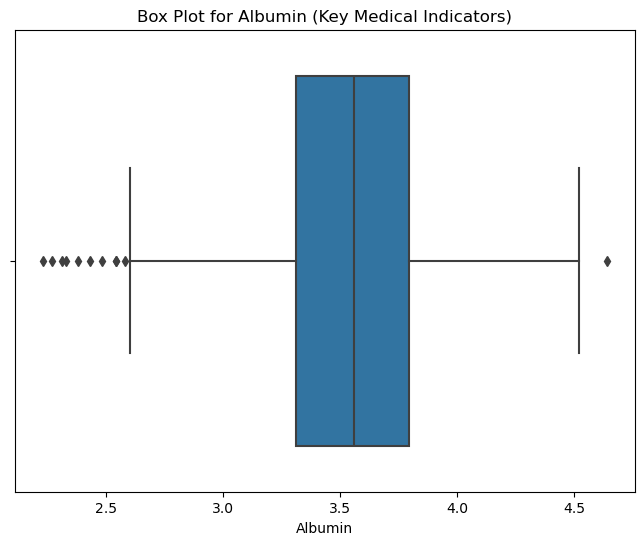

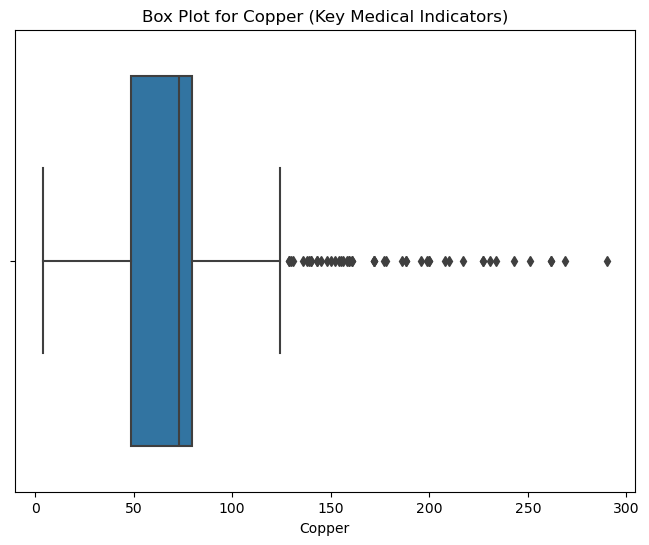

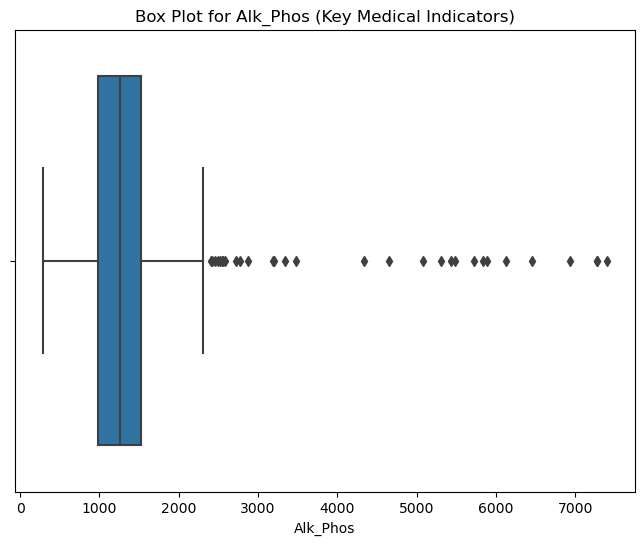

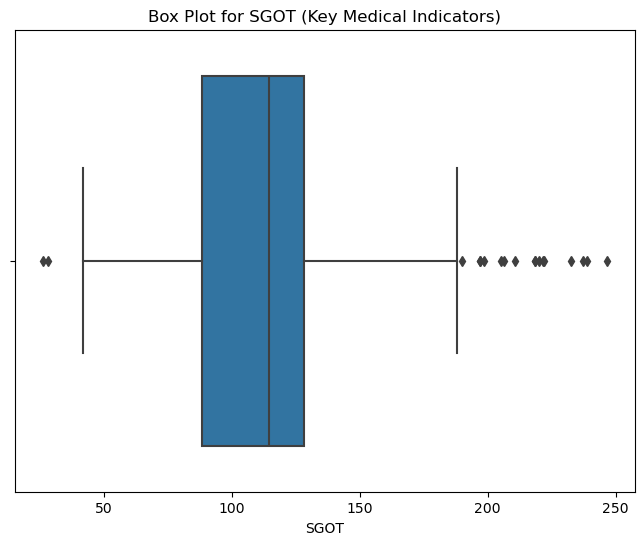

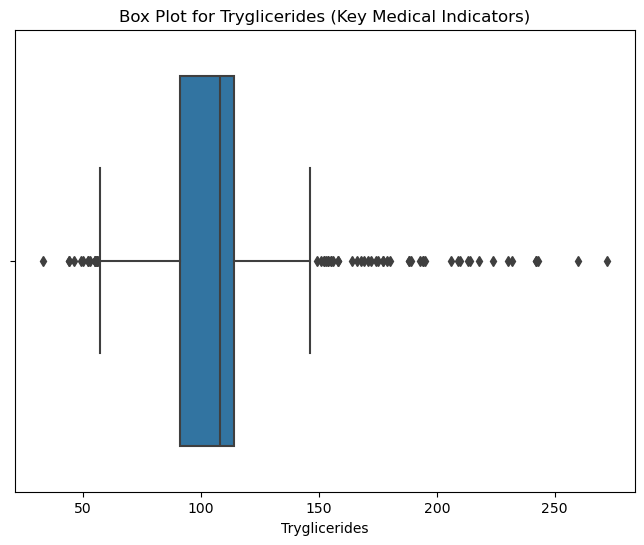

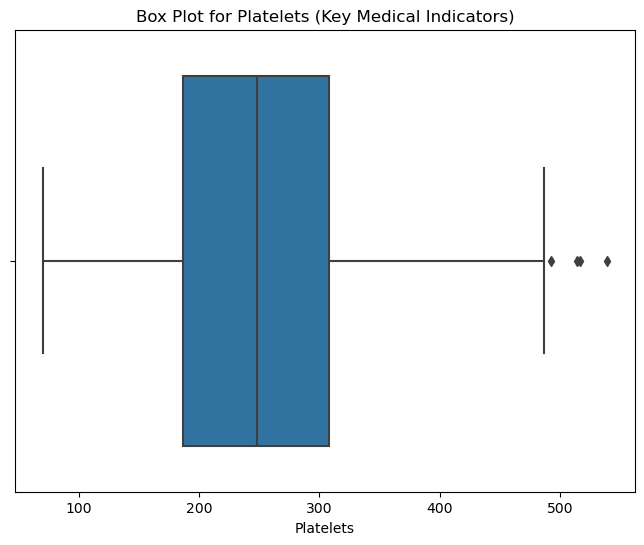

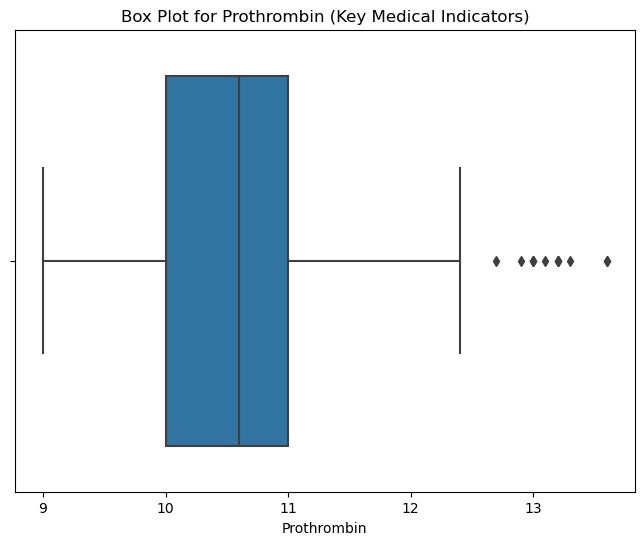

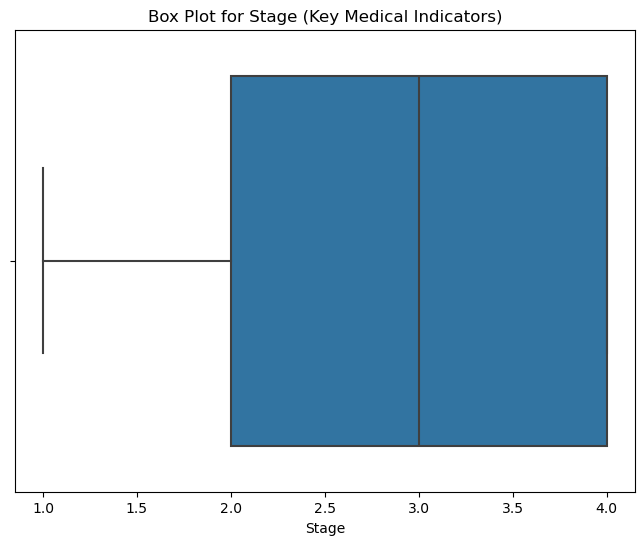

In [312]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=col)
    plt.title(f'Box Plot for {col} (Key Medical Indicators)')
    plt.show()

# Data preprocessing

### Splitting dataset into features and label

In [313]:
# Split the dataset into features and labels
X = data.drop('Status', axis=1)
y = data['Status']

### Data Normaization

In [314]:
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(X)

### Splitting the data into training and test

In [315]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Visual representation of numerical Data after imputation

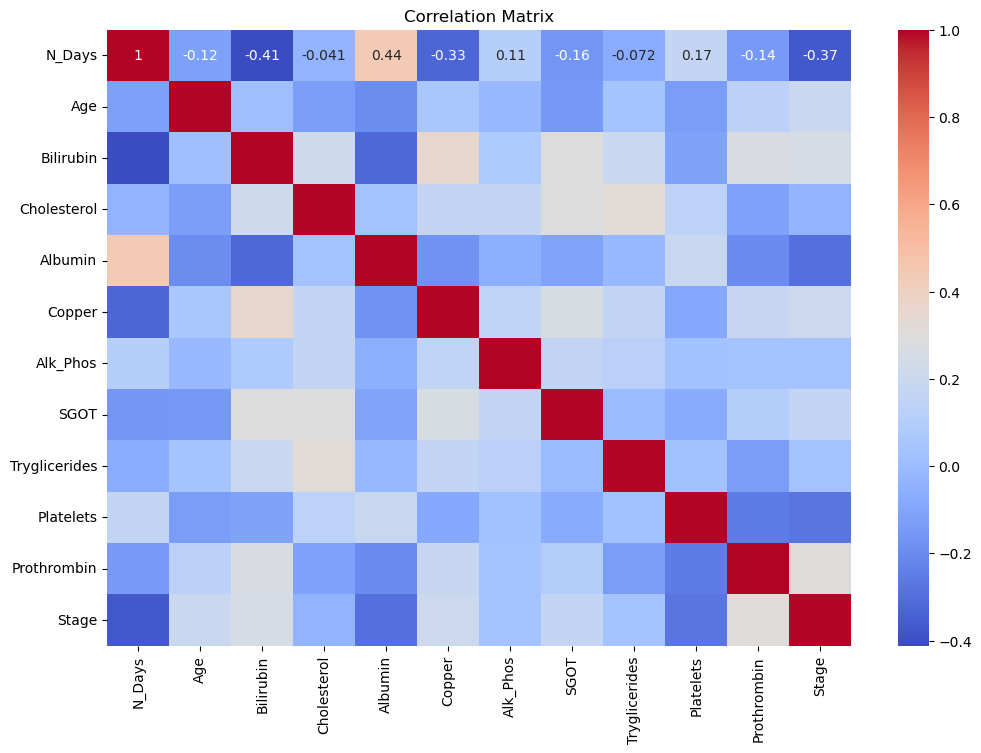

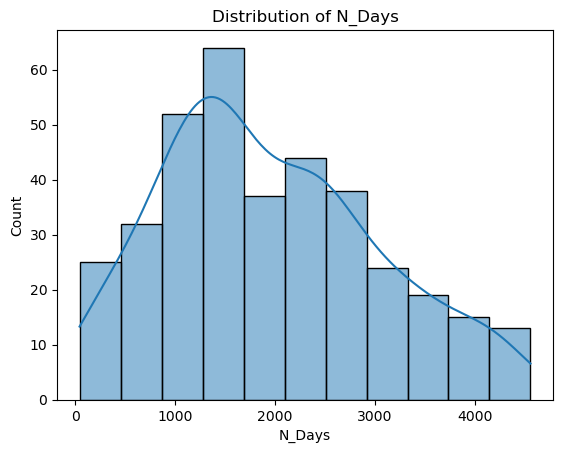

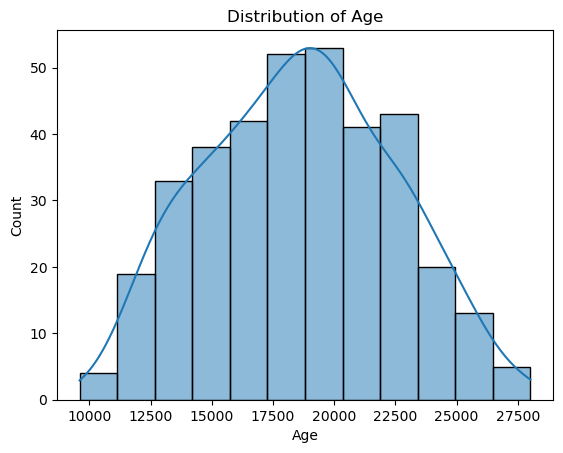

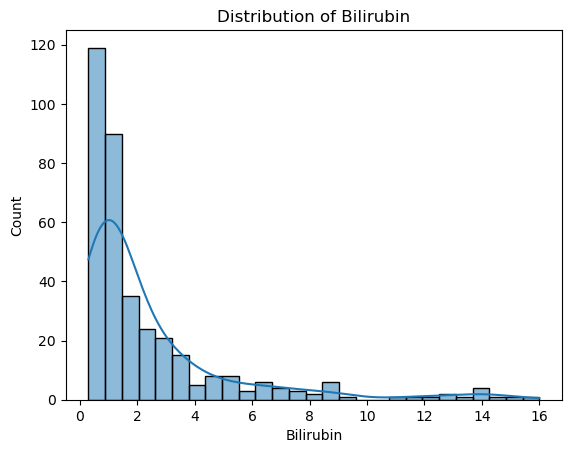

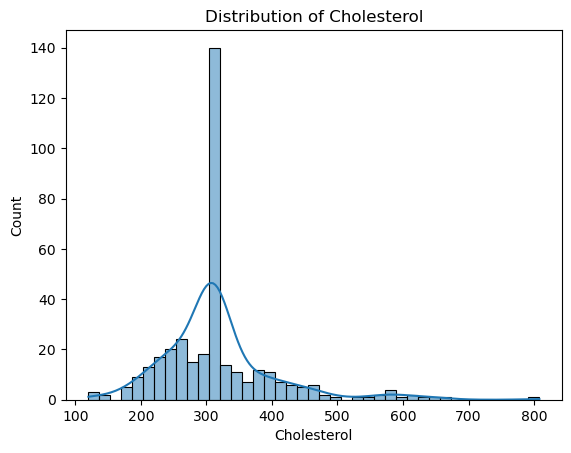

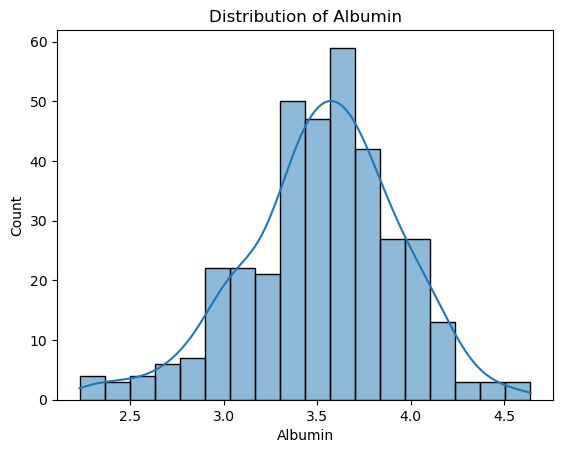

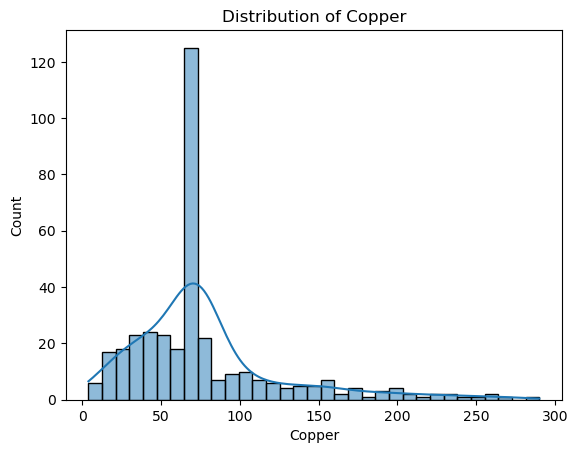

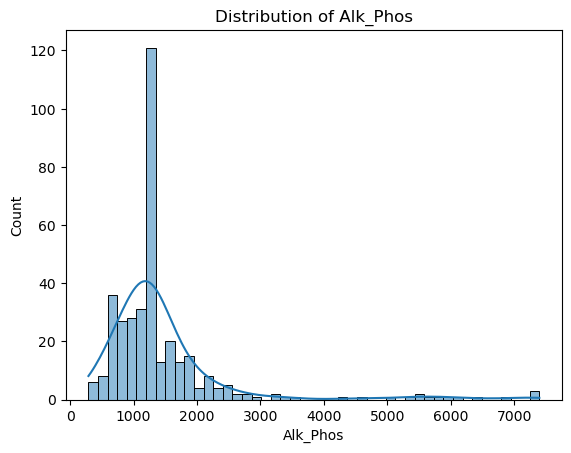

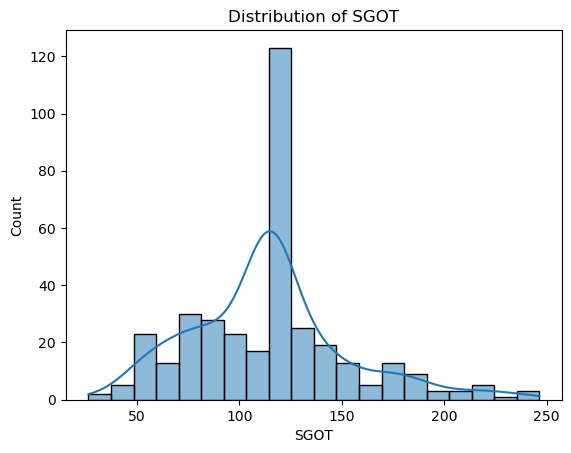

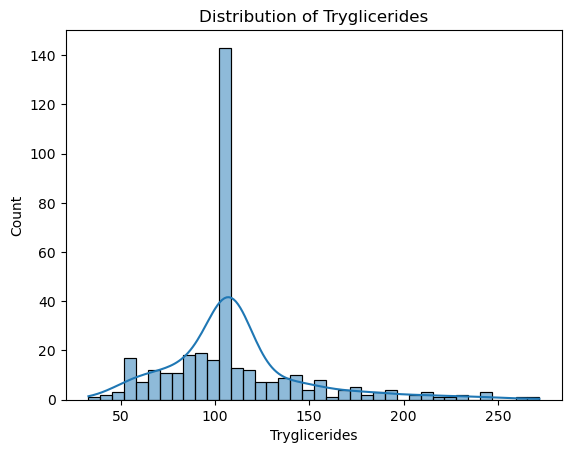

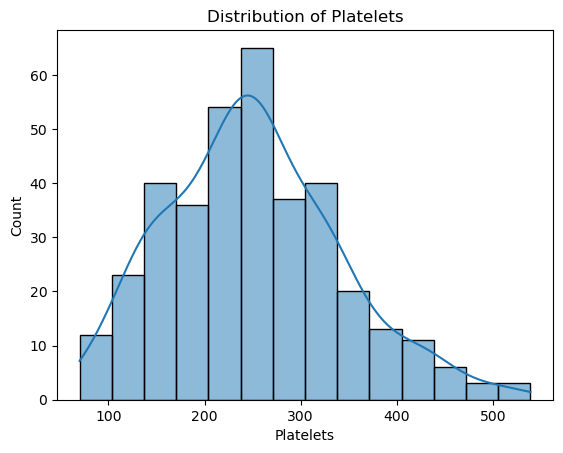

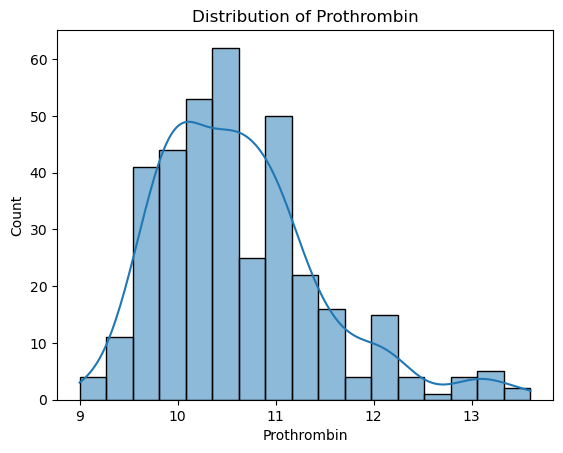

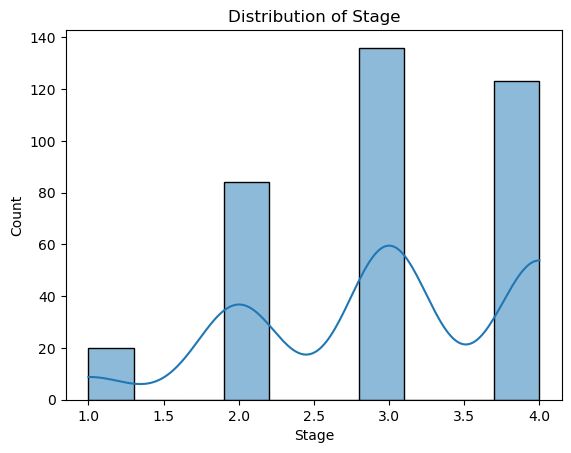

In [316]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

for col in numerical_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Tasks

# Task 1 - Multiclass SVM

In [317]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Recursive Feature Elimination with Cross-Validation (RFECV)
svm = SVC(kernel='linear')
rfecv = RFECV(estimator=svm, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

# Print the selected features
print("Selected Features for SVM:", X.columns[rfecv.support_])

# Create a pipeline with feature scaling and SVM
pipe = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])

# Hyperparameter tuning with GridSearchCV
param_grid = {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf', 'poly'], 'svm__gamma': ['scale', 'auto']}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best SVM model
svm_best = grid_search.best_estimator_['svm']

# Train the SVM model on the training set
svm_best.fit(X_train_scaled, y_train)

# Evaluate the best SVM model on the test set
svm_pred = svm_best.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Best SVM Accuracy on Test Set: {svm_accuracy}")
print(classification_report(y_test, svm_pred))


Selected Features for SVM: Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Edema',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')
Best SVM Accuracy on Test Set: 0.726027397260274
              precision    recall  f1-score   support

           0       0.84      0.55      0.67        29
           1       0.69      0.93      0.79        40
           2       0.00      0.00      0.00         4

    accuracy                           0.73        73
   macro avg       0.51      0.49      0.48        73
weighted avg       0.71      0.73      0.70        73



### Ensemble SVM with Gradient Boosting

In [318]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_resampled)
X_test_poly = poly.transform(X_test)
# Ensemble Method: Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_poly, y_train_resampled)
gb_pred = gb.predict(X_test_poly)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy on Test Set: {gb_accuracy}")

Gradient Boosting Accuracy on Test Set: 0.6575342465753424


### Data Augmentation with SMOTE

In [319]:
# Data Augmentation with SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

svm_smote = SVC(kernel='linear')
svm_smote.fit(X_resampled, y_resampled)
svm_smote_pred = svm_smote.predict(X_test_scaled)
svm_smote_accuracy = accuracy_score(y_test, svm_smote_pred)
print(f"SMOTE SVM Accuracy on Test Set: {svm_smote_accuracy}")

SMOTE SVM Accuracy on Test Set: 0.589041095890411


# Task 2 - Multilayer Perceptron (MLP)

In [320]:
mlp = MLPClassifier(hidden_layer_sizes=(25, 18, 10, 5), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f"MLP Accuracy: {mlp_accuracy:.2f}")

MLP Accuracy: 0.55


### Mlp dropout

In [321]:

mlp_dropout_probs = mlp_dropout.predict(X_test_scaled)

# Get the predicted class labels (indices of maximum probability)
mlp_dropout_pred = np.argmax(mlp_dropout_probs, axis=1)

# Calculate accuracy
mlp_dropout_accuracy = accuracy_score(y_test, mlp_dropout_pred)
print(f"MLP with Dropout Regularization Accuracy: {mlp_dropout_accuracy:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MLP with Dropout Regularization Accuracy: 0.71


### MLP with augmentation and Learning Rate Decay

In [322]:

mlp_augmented_probs = mlp_augmented.predict(X_test_scaled)

# Get the predicted class labels (indices of maximum probability)
mlp_augmented_pred = np.argmax(mlp_augmented_probs, axis=1)

# Calculate accuracy
mlp_augmented_accuracy = accuracy_score(y_test, mlp_augmented_pred)
print(f"MLP with Augmentation and Learning Rate Decay Accuracy: {mlp_augmented_accuracy:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MLP with Augmentation and Learning Rate Decay Accuracy: 0.68


### Task3 - CNN

In [323]:

# Reshape data for CNN
X_train_cnn = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

# Build CNN model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, padding='same', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming y_train and y_test are pandas Series, convert them to integer type
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Train model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Predictions
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=-1)

# Evaluation
print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn))
print("CNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cnn))

# Accuracy
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print("CNN Accuracy: {:.2f}%".format(accuracy_cnn * 100))


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4656 - loss: 280.7116 - val_accuracy: 0.5479 - val_loss: 123.1724
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4866 - loss: 86.9996 - val_accuracy: 0.6027 - val_loss: 50.5355
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5890 - loss: 41.2403 - val_accuracy: 0.4521 - val_loss: 17.0432
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4852 - loss: 20.9031 - val_accuracy: 0.7260 - val_loss: 19.0303
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6473 - loss: 33.4140 - val_accuracy: 0.5616 - val_loss: 35.8735
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6075 - loss: 35.1082 - val_accuracy: 0.7534 - val_loss: 16.2944
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6165 - loss: 22.4648 - val_accuracy: 0.4247 - val_loss: 24.8609
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5103 - loss: 24.4875 - val_accuracy: 

### Task4 - Clusteting

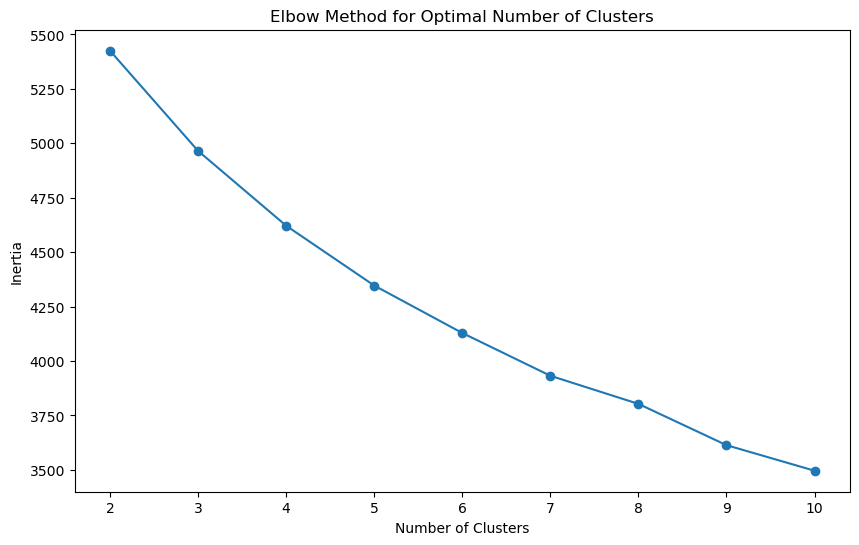

Clustering Accuracy: 0.2369146005509642
              precision    recall  f1-score   support

           0       0.09      0.12      0.11       122
           1       0.47      0.31      0.38       220
           2       0.05      0.10      0.07        21
           3       0.00      0.00      0.00         0

    accuracy                           0.24       363
   macro avg       0.15      0.13      0.14       363
weighted avg       0.32      0.24      0.27       363



In [324]:


# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Set environment variable to avoid memory leak warning

# Dimensionality reduction with PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Perform K-Means clustering with the optimal number of clusters
optimal_clusters = 4  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Evaluate clustering performance
cluster_accuracy = accuracy_score(y, cluster_labels)
print(f"Clustering Accuracy: {cluster_accuracy}")
print(classification_report(y, cluster_labels))


###  Hierarchical Clustering

In [325]:


def evaluate_clustering(X, y_true, labels):
    accuracy = accuracy_score(y_true, labels)
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    
    print("Clustering Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Silhouette Score: {silhouette:.2f}")
    print(f"Davies-Bouldin Score: {davies_bouldin:.2f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz:.2f}")

# Method 1: Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical_clustering.fit_predict(X_pca)
evaluate_clustering(X_pca, y, hierarchical_labels)

Clustering Evaluation Metrics:
Accuracy: 0.23
Silhouette Score: 0.10
Davies-Bouldin Score: 2.31
Calinski-Harabasz Score: 34.67


### Gaussian

In [326]:
gmm = GaussianMixture(n_components=4, covariance_type='full')
gmm_labels = gmm.fit_predict(X_pca)
evaluate_clustering(X_pca, y, gmm_labels)

Clustering Evaluation Metrics:
Accuracy: 0.10
Silhouette Score: 0.12
Davies-Bouldin Score: 2.61
Calinski-Harabasz Score: 26.35


### Hyperparameter Tuning

In [327]:
kmeans = KMeans()
param_grid = {'n_clusters': [2, 3, 4, 5]}
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X_pca)
best_kmeans = grid_search.best_estimator_
best_kmeans_labels = best_kmeans.fit_predict(X_pca)
evaluate_clustering(X_pca, y, best_kmeans_labels)

Clustering Evaluation Metrics:
Accuracy: 0.31
Silhouette Score: 0.11
Davies-Bouldin Score: 2.11
Calinski-Harabasz Score: 39.09


###  Robustness Testing

In [328]:
X_perturbed = X_pca + np.random.normal(loc=0, scale=0.1, size=X_pca.shape)
kmeans_perturbed = KMeans(n_clusters=4)
kmeans_perturbed_labels = kmeans_perturbed.fit_predict(X_perturbed)
evaluate_clustering(X_pca, y, kmeans_perturbed_labels)

Clustering Evaluation Metrics:
Accuracy: 0.51
Silhouette Score: 0.12
Davies-Bouldin Score: 2.22
Calinski-Harabasz Score: 40.36
